<a href="https://colab.research.google.com/github/kyliestephens/DS1002/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

---

In [4]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [54]:
series1 = pd.Series(list)
series1

0    98
1    24
2    46
3    87
4    33
dtype: int64

3. Take the above series and add an index that starts at 2 and steps by 3

In [6]:
index = np.arange(2,len(series1) *3 +2, 3)
series1index = index
print(series1index)

[ 2  5  8 11 14]


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [7]:
dict1 = ({
    'names': ["tom", "kim", "kylie", "kody"],
    'ages': [57, 54, 19, 17],
    'careers': ["lawyer", "consultant", "student", "student"]
})

df = pd.DataFrame(dict1)
df


,names,ages,careers
0,tom,57,lawyer
1,kim,54,consultant
2,kylie,19,student
3,kody,17,student


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [8]:
df.index.name = "participant id"
df

,names,ages,careers
participant id,,,
0,tom,57,lawyer
1,kim,54,consultant
2,kylie,19,student
3,kody,17,student


6. Use a pandas function to determine the data types of the columns of `df`.

In [9]:
datatypes_of_columns = df.dtypes
print(datatypes_of_columns)

names      object
ages        int64
careers    object
dtype: object


7. Using bracket notation, reference column `name`

In [56]:
df['careers'] #referencing the column named careers

participant id
0        lawyer
1    consultant
2       student
3       student
Name: careers, dtype: object

8. Using dot notation, reference column `name`

In [11]:
df.careers #referencing the column named careers

participant id
0        lawyer
1    consultant
2       student
3       student
Name: careers, dtype: object

8. Reference column `name` and have it returned in a dataframe.

In [57]:
df[['careers']]

,careers
participant id,
0,lawyer
1,consultant
2,student
3,student


9. Show the 3rd element in column `career`.

In [58]:
df.at[2, 'careers']

'student'

10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [14]:
iris = sns.load_dataset('iris')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [64]:
firstquestion = iris[['sepal_length', 'sepal_width']].corr()
value1 = firstquestion.iloc[0,1]

print(firstquestion)
print('correlation is:', value1)

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000
correlation is: -0.11756978413300088


In [25]:
#Another Way to Do
iris.to_csv('./iris_data.csv')
iris_loaded = pd.read_csv('./iris_data.csv')
iris_loaded.head()
newform = iris.sort_index(axis=0, ascending=False)
newform
allspecies = newform.iloc[0:150]
allspecies[['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [26]:
iris_loaded = pd.read_csv('./iris_data.csv')
iris_loaded.head()
newform = iris.sort_index(axis=0, ascending=False)
newform
#By sorting the list as newform, I was abe to see that [0,49] was species setosa, [50,99] was species versicolor, and [100,149] was species virginica.





,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [27]:
setosa_ = newform.iloc[0:50]
setosa_coeff= setosa_[['sepal_length','sepal_width']].corr()
setosa = setosa_coeff.iloc[0,1]
print(setosa)

0.45722781639411303


In [28]:
versicolor_ = newform.iloc[50:100]
versicolor_coeff = versicolor_[['sepal_length','sepal_width']].corr()
versicolor = versicolor_coeff.iloc[0,1]
print(versicolor)

0.5259107172828247


In [29]:
virginica_ = newform.iloc[100:150]
virginica_coeff = virginica_[['sepal_length','sepal_width']].corr()
virginica = virginica_coeff.iloc[0,1]
print(virginica)

0.7425466856651595


In [68]:
species_coeffs = [virginica, setosa, versicolor]
max_coeff = max(species_coeffs)
max_coeff2 = 'virginica'
print("The highest correlation between sepal length and width is in species:", max_coeff2)




The highest correlation between sepal length and width is in species: virginica


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [46]:
#Confirms statement made in question that sepal width and petal length are the most negatively correlated overall.
allspecies_coeffs = iris.corr()
min_value = allspecies_coeffs.min().min()
print(min_value)
min_row_index = allspecies_coeffs.idxmin()
min_column_index = allspecies_coeffs.min().idxmin()
min_row_name = min_row_index[min_column_index]
min_column_name = min_column_index
print("Variable 1:", min_column_name)
print("Variable 2:", min_row_name)


-0.42844010433053864
Variable 1: sepal_width
Variable 2: petal_length


<ipython-input-46-d0a4e9cd6a36>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  allspecies_coeffs = iris.corr()


In [45]:
setosa_coeffs = setosa_.corr()
min_value = setosa_coeffs.min().min()

min_row_index = setosa_coeffs.idxmin()
min_column_index = setosa_coeffs.min().idxmin()
min_row_name = min_row_index[min_column_index]
min_column_name = min_column_index
print("Variable 1:", min_column_name)
print("Variable 2:", min_row_name)

print("Most negative correlation value for setosa species: ", min_value)
setosa_coeffs

Variable 1: sepal_length
Variable 2: petal_width
Most negative correlation value for setosa species:  0.2811077091573192


<ipython-input-45-da8219b6508e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  setosa_coeffs = setosa_.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [44]:
versicolor_coeffs = versicolor_.corr()
min_value = versicolor_coeffs.min().min()

min_row_index = versicolor_coeffs.idxmin()
min_column_index = versicolor_coeffs.min().idxmin()
min_row_name = min_row_index[min_column_index]
min_column_name = min_column_index
print("Variable 1:", min_column_name)
print("Variable 2:", min_row_name)

print("Most negative correlation value for versicolor species: ", min_value)
versicolor_coeffs

Variable 1: sepal_length
Variable 2: sepal_width
Most negative correlation value for versicolor species:  0.5259107172828247


<ipython-input-44-ed42dead38e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  versicolor_coeffs = versicolor_.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [48]:
virginica_coeffs = virginica_.corr()
min_value = virginica_coeffs.min().min()


min_row_index = virginica_coeffs.idxmin()
min_column_index = virginica_coeffs.min().idxmin()
min_row_name = min_row_index[min_column_index]
min_column_name = min_column_index
print("Variable 1:", min_column_name)
print("Variable 2:", min_row_name)

print("Most negative correlation value for virginica species: ", min_value)
virginica_coeffs

Variable 1: sepal_width
Variable 2: petal_length
Most negative correlation value for virginica species:  0.1776999667822706


<ipython-input-48-394f47fefe3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  virginica_coeffs = virginica_.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


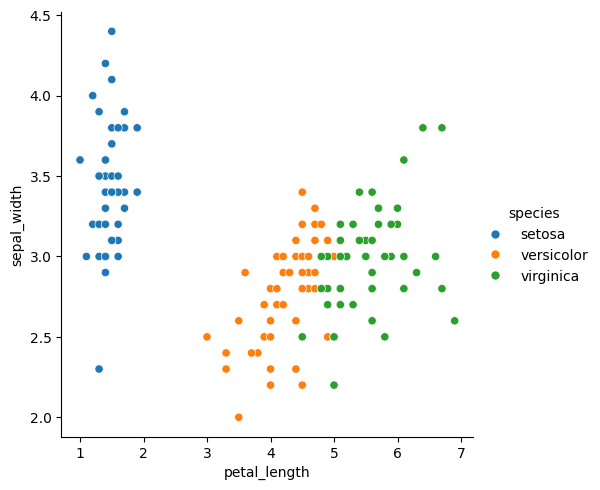

In [53]:
sns.relplot(iris, x='petal_length', y='sepal_width', hue='species')
#This is possible because of Simpson's Paradox, which states that an association (correlation) between two variables can reverse or disappear when the population is divided into subgroups.
#In this case, the population is all of the iris data and the subgroups are the three different species. As seen below, the correlation might be positive or neutral for each species,
#which cause it to switch for the whole population grouped together.